In [1]:
import random
import time
import astropy.io.fits as fits
import astropy.wcs as wcs
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky

In [2]:
datadir='../../doc/20170617_Stacking/maps/hsccats/'
def clean_hsc(df):
    start_time = time.time()
    ra_arr = np.array(df['ra'])*3600
    dec_arr = np.array(df['dec'])*3600
    gcls_arr = np.array(df['gcls'])
    Nnan_arr = np.array(df.isnull().sum(axis=1))
    idx_arr = np.arange(len(df))
    idx_use = []
    while len(idx_arr) > 0:
        idxi = idx_arr[0]
        sp = np.where((abs(ra_arr[0] - ra_arr)<0.2) & (abs(dec_arr[0] - dec_arr)<0.1) \
                      & (gcls_arr[0]==gcls_arr))[0]
        if len(sp)==0:
            sp = np.array([0])
        idxs = idx_arr[sp]
        ras = ra_arr[sp]
        decs = dec_arr[sp]
        decrads = decs/3600/180*np.pi
        ds = np.sqrt(((ras[0]-ras)*np.cos((decrads[0]+decrads)/2))**2 + (decs[0] - decs)**2)
        sp1 = np.where(ds<0.1)[0]
        idxs = idxs[sp1]
        if len(idxs) == 1:
            idx_use.append(int(idxs))
        else:
            idx_use.append(idxs[np.argmin(Nnan_arr[sp[sp1]])])

        idx_arr = np.delete(idx_arr,sp[sp1])
        ra_arr = np.delete(ra_arr,sp[sp1])
        dec_arr = np.delete(dec_arr,sp[sp1])
        Nnan_arr = np.delete(Nnan_arr,sp[sp1])
        gcls_arr = np.delete(gcls_arr,sp[sp1])

    print('cleaning df (%d -> %d), time = %.2f min'%(len(df),len(idx_use),(time.time()-start_time)/60))
    return df.iloc[idx_use]

In [3]:
field = 'test'
df = pd.read_csv(datadir + field + '_raw.csv')
df.rename(columns={"# ra": "ra"}, inplace = True)

In [4]:
# cleaning
df_clean = pd.DataFrame()
ra_lims = np.linspace(min(df['ra']),max(df['ra']),9)
dec_lims = np.linspace(min(df['dec']),max(df['dec']),9)
for ira,(ra1,ra2) in enumerate(zip(ra_lims[:-1],ra_lims[1:])):
    for idec,(dec1,dec2) in enumerate(zip(dec_lims[:-1],dec_lims[1:])):
        print("cleaning region (%d,%d)"%(ira,idec))
        dfs = df[(df['ra']>=ra1) & (df['ra']<ra2) & (df['dec']>=dec1) & (df['dec']<dec2)]
        dfs = clean_hsc(dfs)
        df_clean = df_clean.append(dfs)

cleaning region (0,0)
cleaning df (12651 -> 7630), time = 0.04 min
cleaning region (0,1)
cleaning df (11853 -> 7564), time = 0.03 min
cleaning region (0,2)
cleaning df (14050 -> 8488), time = 0.03 min
cleaning region (0,3)
cleaning df (19765 -> 8933), time = 0.04 min
cleaning region (0,4)
cleaning df (24197 -> 9383), time = 0.04 min
cleaning region (0,5)
cleaning df (14552 -> 8465), time = 0.04 min
cleaning region (0,6)
cleaning df (12484 -> 7809), time = 0.03 min
cleaning region (0,7)
cleaning df (13347 -> 8140), time = 0.03 min
cleaning region (1,0)
cleaning df (9472 -> 7469), time = 0.03 min
cleaning region (1,1)
cleaning df (8782 -> 7346), time = 0.03 min
cleaning region (1,2)
cleaning df (9754 -> 7639), time = 0.03 min
cleaning region (1,3)
cleaning df (13642 -> 8498), time = 0.04 min
cleaning region (1,4)
cleaning df (18693 -> 8876), time = 0.04 min
cleaning region (1,5)
cleaning df (10233 -> 7659), time = 0.04 min
cleaning region (1,6)
cleaning df (10620 -> 8444), time = 0.04 mi

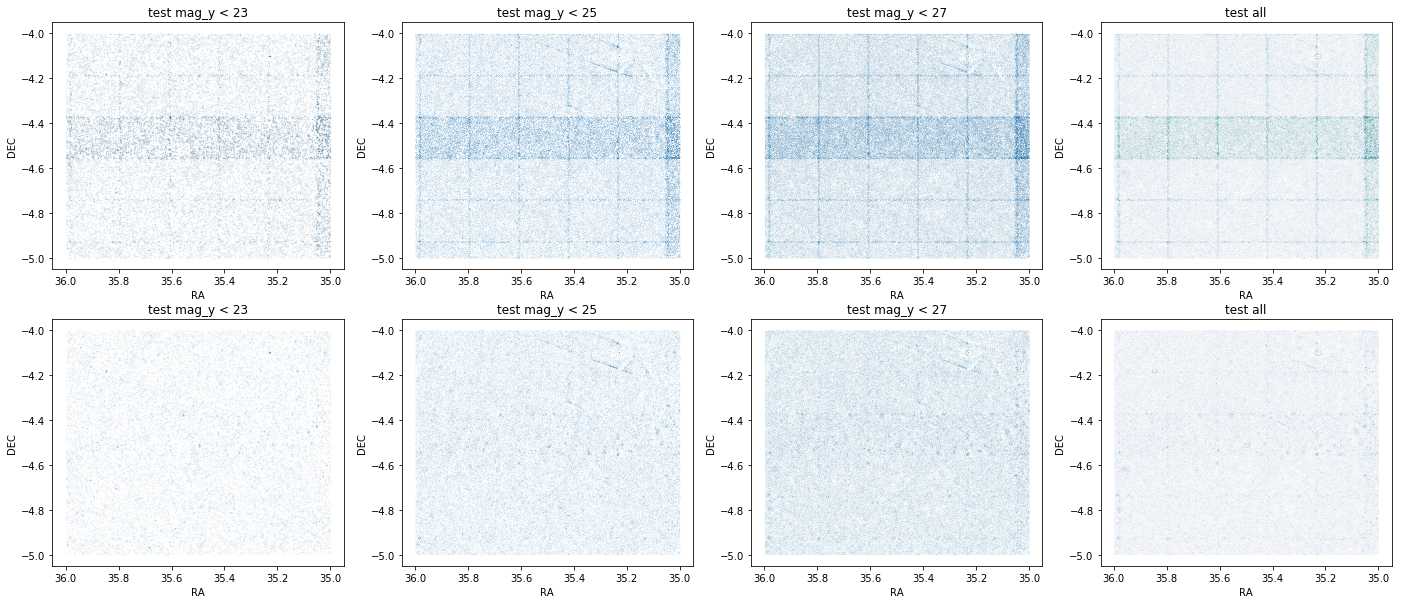

In [5]:
# plot cleaning map
fig, ax = plt.subplots(2,4,figsize=(24,10))

ax[0][0].scatter(df['ra'][df['ymag_psf']<23], df['dec'][df['ymag_psf']<23], s=0.0002)
ax[0][0].set_xlabel('RA')
ax[0][0].set_ylabel('DEC')
ax[0][0].set_title(field + ' mag_y < 23')
# ax[0][0].set_xlim([239.5,246])
# ax[0][0].set_ylim([53,57])
ax[0][0].invert_xaxis()

ax[0][1].scatter(df['ra'][df['ymag_psf']<25], df['dec'][df['ymag_psf']<25], s=0.0001)
ax[0][1].set_xlabel('RA')
ax[0][1].set_ylabel('DEC')
ax[0][1].set_title(field + ' mag_y < 25')
# ax[0][1].set_xlim([239.5,246])
# ax[0][1].set_ylim([53,57])
ax[0][1].invert_xaxis()

ax[0][2].scatter(df['ra'][df['ymag_psf']<27], df['dec'][df['ymag_psf']<27], s=0.00005)
ax[0][2].set_xlabel('RA')
ax[0][2].set_ylabel('DEC')
ax[0][2].set_title(field + ' mag_y < 27')
# ax[0][2].set_xlim([239.5,246])
# ax[0][2].set_ylim([53,57])
ax[0][2].invert_xaxis()

ax[0][3].scatter(df['ra'], df['dec'], s=0.00001)
ax[0][3].set_xlabel('RA')
ax[0][3].set_ylabel('DEC')
ax[0][3].set_title(field + ' all')
# ax[0][3].set_xlim([239.5,246])
# ax[0][3].set_ylim([53,57])
ax[0][3].invert_xaxis()

ax[1][0].scatter(df_clean['ra'][df_clean['ymag_psf']<23], df_clean['dec'][df_clean['ymag_psf']<23], s=0.0002)
ax[1][0].set_xlabel('RA')
ax[1][0].set_ylabel('DEC')
ax[1][0].set_title(field + ' mag_y < 23')
# ax[1][0].set_xlim([239.5,246])
# ax[1][0].set_ylim([53,57])
ax[1][0].invert_xaxis()

ax[1][1].scatter(df_clean['ra'][df_clean['ymag_psf']<25], df_clean['dec'][df_clean['ymag_psf']<25], s=0.0001)
ax[1][1].set_xlabel('RA')
ax[1][1].set_ylabel('DEC')
ax[1][1].set_title(field + ' mag_y < 25')
# ax[1][1].set_xlim([239.5,246])
# ax[1][1].set_ylim([53,57])
ax[1][1].invert_xaxis()

ax[1][2].scatter(df_clean['ra'][df_clean['ymag_psf']<27], df_clean['dec'][df_clean['ymag_psf']<27], s=0.00005)
ax[1][2].set_xlabel('RA')
ax[1][2].set_ylabel('DEC')
ax[1][2].set_title(field + ' mag_y < 27')
# ax[1][2].set_xlim([239.5,246])
# ax[1][2].set_ylim([53,57])
ax[1][2].invert_xaxis()

ax[1][3].scatter(df_clean['ra'], df_clean['dec'], s=0.00001)
ax[1][3].set_xlabel('RA')
ax[1][3].set_ylabel('DEC')
ax[1][3].set_title(field + ' all')
# ax[1][3].set_xlim([239.5,246])
# ax[1][3].set_ylim([53,57])
ax[1][3].invert_xaxis()


## create lephare input file

In [6]:
df_in = df_clean[['gmag_psf','gmag_psf_err','rmag_psf','rmag_psf_err','imag_psf','imag_psf_err',
                   'zmag_psf','zmag_psf_err','ymag_psf','ymag_psf_err',
                   'gcls', 'rcls', 'icls', 'zcls', 'ycls', 'photz']].copy()
df_in['Imag'] = np.ones(len(df_in))*-99
df_in['Imag_err'] = np.ones(len(df_in))*-99
df_in['Hmag'] = np.ones(len(df_in))*-99
df_in['Hmag_err'] = np.ones(len(df_in))*-99

# drop rows with no mag in all bands
sp = np.all(np.isnan(df_in[['gmag_psf','rmag_psf','imag_psf','zmag_psf','ymag_psf']]),axis=1)
df_in = df_in.iloc[~sp]

# set class to NaN if no mag in that band
for band in ['g','r','i','z','y']:
    sp = np.isnan(df_in[band + 'mag_psf'])
    df_in[band + 'cls'].iloc[np.where(sp)[0]] = np.nan
    
# get class
cls = np.nanmean(df_in[['gcls','rcls','icls','zcls','ycls']], axis=1)
cls[cls < 0.5] = -1
cls[cls > 0.5] = 1
cls[cls == 0.5] = 2
df_in['cls'] = cls

df_in.drop(['gcls','rcls','icls','zcls','ycls'], axis=1, inplace=True)

df_in = df_in.fillna(-99)
df_in = df_in.sample(n=10000)
df_in = df_in.reset_index(drop=True)
df_in.index += 1

In [7]:
def get_CIBER_mag_linear(df):
    Imag_arr = np.zeros(len(df))
    Hmag_arr = np.zeros(len(df))

    mags = df[['gmag_psf','rmag_psf','imag_psf','zmag_psf','ymag_psf']]
    mags = mags.replace(-99, np.nan)
    mags_exist = ~pd.isnull(mags)*1

    # if only have mag in one band
    sp1 = np.where(mags_exist.sum(axis=1)==1)[0]
    Imag_arr[sp1] = np.nanmean(np.array(mags)[sp1,:],axis=1)
    Hmag_arr[sp1] = np.nanmean(np.array(mags)[sp1,:],axis=1)

    # if more than two mag data
    sp2 = np.where(mags_exist.sum(axis=1)>1)[0]
    mags2 = np.array(mags)[sp2,:]
    mags2_exist = np.array(mags_exist)[sp2,:]
    wl1_vec = np.zeros(mags2.shape[0])
    wl2_vec = np.zeros(mags2.shape[0])
    wl_eff = [0.4754,0.6175,0.7711,0.8898,0.9762]
    mag1_vec = np.zeros(mags2.shape[0])
    mag2_vec = np.zeros(mags2.shape[0])
    for i in range(mags2.shape[0]):
        idxs = np.where(mags2_exist[i,:]==1)[0][-2:]
        wl1_vec[i] = wl_eff[idxs[0]]
        wl2_vec[i] = wl_eff[idxs[1]]
        mag1_vec[i] = mags2[i,idxs[0]]
        mag2_vec[i] = mags2[i,idxs[1]]

    # extrapolation
    Imag_arr[sp2] = (1.05 - wl1_vec) / (wl2_vec - wl1_vec) * (mag2_vec - mag1_vec) + mag1_vec
    Hmag_arr[sp2] = (1.79 - wl1_vec) / (wl2_vec - wl1_vec) * (mag2_vec - mag1_vec) + mag1_vec

    # set bright (extrapolated mag < 12) source to mag=12 
    Imag_arr[np.where(Imag_arr < 12)[0]] = 12
    Hmag_arr[np.where(Hmag_arr < 12)[0]] = 12

    df['Ilin'] = Imag_arr
    df['Hlin'] = Hmag_arr
    return df
df_in = get_CIBER_mag_linear(df_in)

In [8]:
df_in.head()

,gmag_psf,gmag_psf_err,rmag_psf,rmag_psf_err,imag_psf,imag_psf_err,zmag_psf,zmag_psf_err,ymag_psf,ymag_psf_err,photz,Imag,Imag_err,Hmag,Hmag_err,cls,Ilin,Hlin
1,25.162703,0.048643,24.824329,0.098765,24.648449,0.044306,24.062200,0.073397,23.807316,0.114210,1.56,-99.0,-99.0,-99.0,-99.0,1.0,23.589602,21.406562
2,26.614010,0.174083,26.110352,0.235568,26.181377,0.185494,26.987209,0.964133,25.936779,0.669900,2.71,-99.0,-99.0,-99.0,-99.0,1.0,25.039536,16.042795
3,26.508354,0.150080,25.914230,0.204853,25.727247,0.104715,25.638220,0.277451,25.802702,0.583202,3.02,-99.0,-99.0,-99.0,-99.0,-1.0,25.943197,27.351957
4,25.636112,0.073402,25.555964,0.145333,25.460392,0.101723,25.252043,0.186313,24.749836,0.261826,1.28,-99.0,-99.0,-99.0,-99.0,1.0,24.320868,20.019559
5,26.137220,0.114798,26.065815,0.275288,26.595028,0.218111,26.001362,0.380052,27.513544,2.824566,1.90,-99.0,-99.0,-99.0,-99.0,1.0,28.805200,41.756761


In [9]:
df_in.describe()

,gmag_psf,gmag_psf_err,rmag_psf,rmag_psf_err,imag_psf,imag_psf_err,zmag_psf,zmag_psf_err,ymag_psf,ymag_psf_err,photz,Imag,Imag_err,Hmag,Hmag_err,cls,Ilin,Hlin
count,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.000000
mean,21.452152,7.848222e+03,21.102316,4.480767e+03,22.875688,5.865854e+02,19.342004,1.226588e+03,14.105455,7.226031e+02,-6.777494,-99.0,-99.0,-99.0,-99.0,0.730000,25.234873,26.200660
std,24.553500,5.420038e+05,24.196620,2.275467e+05,18.471870,1.754578e+04,26.864535,6.931534e+04,35.472420,6.890632e+04,27.908984,0.0,0.0,0.0,0.0,0.713968,3.278880,13.535361
min,-99.000000,-9.900000e+01,-99.000000,-9.900000e+01,-99.000000,-9.900000e+01,-99.000000,-9.900000e+01,-99.000000,-9.900000e+01,-99.000000,-99.0,-99.0,-99.0,-99.0,-1.000000,12.000000,12.000000
25%,25.318823,5.646228e-02,24.824775,8.164592e-02,24.735186,4.467293e-02,24.191190,7.773842e-02,23.842296,1.004599e-01,0.780000,-99.0,-99.0,-99.0,-99.0,1.000000,23.829332,20.263581
50%,26.223782,1.295382e-01,25.747659,1.888470e-01,25.649749,1.036967e-01,25.251423,2.059736e-01,24.969838,2.839440e-01,1.290000,-99.0,-99.0,-99.0,-99.0,1.000000,24.823258,23.560486
75%,26.849805,2.316492e-01,26.481162,3.710901e-01,26.244210,1.763296e-01,26.031646,4.246769e-01,25.814380,6.189143e-01,2.300000,-99.0,-99.0,-99.0,-99.0,1.000000,26.030549,27.693282
max,47.732956,5.137364e+07,45.752159,1.958651e+07,43.200348,1.040414e+06,44.135513,6.817180e+06,43.480244,6.888624e+06,5.030000,-99.0,-99.0,-99.0,-99.0,2.000000,59.510493,199.258439


In [10]:
df_lph = df_in[['gmag_psf','gmag_psf_err','rmag_psf','rmag_psf_err','imag_psf','imag_psf_err',
                   'zmag_psf','zmag_psf_err','ymag_psf','ymag_psf_err','Imag','Imag_err','Hmag','Hmag_err']].copy()
savedir = '~/ciber/lephare/lephare_dev/hsc/'
df_lph.to_csv(savedir + 'test' +'.in',sep=' ',header=False, float_format='%.3e')

## ...run lephare...
cls: -1(stars), 1(gals), 2(QSO)

In [83]:
names = ['id' , 'z_b' , 'z_b68l' , 'z_b68h' ,'z_ml','CHI_BEST','MOD_BEST','NBAND_USED',
         'Z_QSO' , 'CHI_QSO' , 'MOD_QSO' , 'MOD_STAR' , 'CHI_STAR', 
         'gmag_mod', 'rmag_mod','imag_mod','zmag_mod','ymag_mod','Imag_mod','Hmag_mod']
df_out = pd.read_csv('/Users/ytcheng/ciber/lephare/lephare_dev/hsc/test.out',sep='\s+',
                     index_col=0,names = names,skiprows=53)
df_out.drop(['MOD_BEST','MOD_STAR','MOD_QSO'], inplace=True, axis=1)
cls = np.argmin(np.array(df_out[['CHI_STAR','CHI_BEST','CHI_QSO']]),axis=1)
cls[cls==0] = -1
df_out['cls'] = cls

In [84]:
df_out.head()

,z_b,z_b68l,z_b68h,z_ml,CHI_BEST,NBAND_USED,Z_QSO,CHI_QSO,CHI_STAR,gmag_mod,rmag_mod,imag_mod,zmag_mod,ymag_mod,Imag_mod,Hmag_mod,cls
id,,,,,,,,,,,,,,,,,
0,1.8101,1.7757,1.8499,1.8583,1.197220,5,2.40,1.155020,84.137400,24.424,24.437,24.403,24.211,24.019,23.645,22.911,2
1,2.3899,2.3022,2.5093,2.3700,0.204300,5,1.20,0.523489,14.416000,25.402,24.905,24.687,24.548,24.311,24.162,22.885,1
2,5.7700,2.6848,6.0000,5.2035,0.179380,3,2.52,0.146025,0.129568,1035.977,30.082,26.266,24.426,24.157,24.061,23.323,-1
3,2.3193,1.0892,2.6321,1.7877,0.031243,5,2.76,0.080649,4.607680,27.178,26.715,26.535,25.958,25.619,25.336,23.763,1
4,2.3644,2.2869,2.4689,2.3152,0.435682,5,2.60,1.763970,4.285720,24.836,24.764,24.832,24.742,24.703,24.628,24.010,1


In [17]:
df_out.describe()

,z_b,z_b68l,z_b68h,z_ml,CHI_BEST,NBAND_USED,Z_QSO,CHI_QSO,CHI_STAR,gmag_mod,rmag_mod,imag_mod,zmag_mod,ymag_mod,Imag_mod,Hmag_mod,cls
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.689342,0.863657,2.310289,0.260539,4.000860e+07,4.761500,1.330276,4.000496e+07,4.000849e+07,53.321270,25.353983,24.945403,24.648479,24.450545,24.365127,23.780895,1.590000
std,6.503602,6.446187,6.547275,13.777850,6.312204e+08,0.599044,6.544426,6.312206e+08,6.312204e+08,164.749748,8.121335,8.045796,8.022789,8.012241,8.012057,8.034628,0.676273
min,-99.000000,-99.000000,-99.000000,-99.000000,2.232770e-18,1.000000,-99.000000,6.747100e-18,6.800770e-14,-99.990000,-99.990000,-99.990000,-99.990000,-99.990000,-99.990000,-99.990000,-1.000000
25%,1.070775,0.269650,1.912825,1.536575,4.807117e-01,5.000000,0.400000,3.703220e-01,2.096605e+00,25.466500,25.046000,24.804000,24.508000,24.299750,24.164000,23.136500,1.000000
50%,1.867050,0.991900,2.692850,2.024200,1.859375e+00,5.000000,1.160000,1.279050e+00,5.491630e+00,26.313000,25.919000,25.671000,25.417000,25.174000,25.069000,24.376500,2.000000
75%,2.953800,1.943575,3.358850,2.666200,5.654987e+00,5.000000,2.760000,3.884905e+00,1.611465e+01,27.002000,26.592250,26.260000,26.059000,25.871000,25.821000,25.552250,2.000000
max,6.000000,5.995200,6.000000,5.979800,1.000000e+10,5.000000,6.000000,1.000000e+10,1.000000e+10,1045.394000,36.878000,33.318000,30.340000,30.288000,30.374000,30.510000,2.000000


In [77]:
df.head(10)

,gmag_psf,gmag_psf_err,rmag_psf,rmag_psf_err,imag_psf,imag_psf_err,zmag_psf,zmag_psf_err,ymag_psf,ymag_psf_err,photz,Imag,Imag_err,Hmag,Hmag_err,cls,Ilin,Hlin,cls_leph,photz_leph
1,25.162703,0.048643,24.824329,0.098765,24.648449,0.044306,24.062200,0.073397,23.807316,0.114210,1.56,23.849,-99.0,23.479,-99.0,1.0,23.589602,21.406562,1,1.2667
2,26.614010,0.174083,26.110352,0.235568,26.181377,0.185494,26.987209,0.964133,25.936779,0.669900,2.71,26.306,-99.0,26.206,-99.0,1.0,25.039536,16.042795,2,-99.0000
3,26.508354,0.150080,25.914230,0.204853,25.727247,0.104715,25.638220,0.277451,25.802702,0.583202,3.02,25.672,-99.0,25.641,-99.0,-1.0,25.943197,27.351957,1,0.5184
4,25.636112,0.073402,25.555964,0.145333,25.460392,0.101723,25.252043,0.186313,24.749836,0.261826,1.28,24.843,-99.0,24.504,-99.0,1.0,24.320868,20.019559,1,1.4187
5,26.137220,0.114798,26.065815,0.275288,26.595028,0.218111,26.001362,0.380052,27.513544,2.824566,1.90,26.406,-99.0,26.557,-99.0,1.0,28.805200,41.756761,1,1.2371
6,26.362328,0.134650,25.837515,0.212459,25.040937,0.063979,24.919075,0.181689,24.477203,0.192999,0.79,24.522,-99.0,23.900,-99.0,1.0,24.099771,20.315223,2,-99.0000
7,25.070301,0.045351,24.337450,0.045405,24.058796,0.024007,23.859306,0.049243,23.602530,0.076327,0.61,23.431,-99.0,22.000,-99.0,-1.0,23.383199,21.183954,2,-99.0000
8,25.807360,0.074294,25.241388,0.106318,24.981133,0.050703,24.623039,0.118003,24.794472,0.232809,0.73,24.600,-99.0,24.351,-99.0,1.0,24.940904,26.409191,2,-99.0000
9,23.871376,0.016047,22.995617,0.016287,22.814224,0.007381,22.575952,0.016812,22.443287,0.026270,0.48,22.254,-99.0,20.950,-99.0,1.0,22.329968,21.193712,2,-99.0000
10,34.641773,310.077240,-99.000000,-99.000000,27.860130,0.773368,28.742268,4.504521,25.478914,0.502398,2.03,25.243,-99.0,23.019,-99.0,1.0,22.691467,12.000000,2,-99.0000


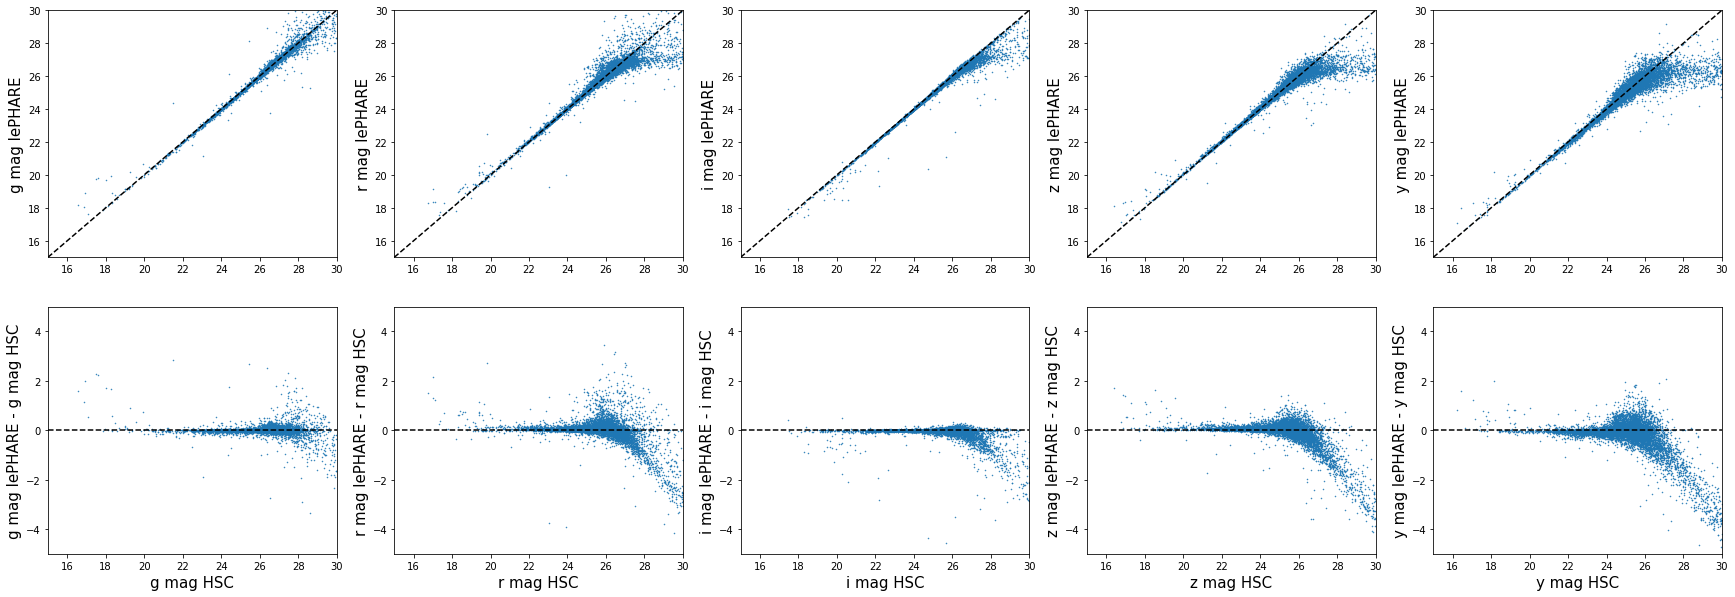

In [18]:
#
fig, ax = plt.subplots(2,5,figsize=(30,10))
for iband,band in enumerate(['g','r','i','z','y']):
    sp = np.where((df_in[band+'mag_psf']>0) & (df_out[band+'mag_mod']>0) & 
                  (df_out[band+'mag_mod']<30) & (df_in[band+'mag_psf']<30))[0]
    ax[0][iband].plot(df_in[band+'mag_psf'].iloc[sp],df_out[band+'mag_mod'].iloc[sp],'.',markersize=1)
    ax[0][iband].plot([15,30],[15,30],'k--')
    ax[0][iband].set_xlim([15,30])
    ax[0][iband].set_ylim([15,30])
    ax[0][iband].set_ylabel(band+' mag lePHARE', fontsize=15)
    
    dm = df_out[band+'mag_mod'].iloc[sp]-df_in[band+'mag_psf'].iloc[sp]
    ax[1][iband].plot(df_in[band+'mag_psf'].iloc[sp],dm,'.',markersize=1)
    ax[1][iband].axhline(0,c='k',ls='--')
    ax[1][iband].set_xlim([15,30])
    ax[1][iband].set_ylim([-5,5])
    ax[1][iband].set_xlabel(band+' mag HSC', fontsize=15)
    ax[1][iband].set_ylabel(band+' mag lePHARE - '+band+' mag HSC', fontsize=15)

Text(0, 0.5, '(z lePHARE - z HSC)/$\\sigma_{\\rm lePHARE}$')

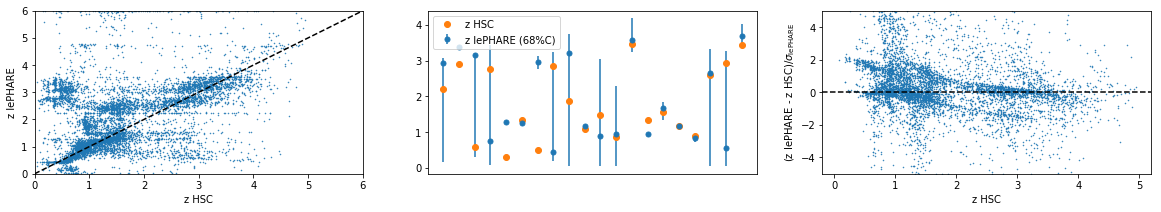

In [19]:
#
fig, ax = plt.subplots(1,3,figsize=(20,3))
sp = np.where((df_in['photz']>0) & (df_out['z_b']>0) & (df_in['cls']==1))[0]
ax[0].plot(df_in['photz'].iloc[sp],df_out['z_b'].iloc[sp],'.',markersize=1)
ax[0].plot([0,6],[0,6],'k--')
ax[0].set_xlim([0,6])
ax[0].set_ylim([0,6])
ax[0].set_xlabel('z HSC', fontsize=10)
ax[0].set_ylabel('z lePHARE', fontsize=10)

sp1 = sp[np.random.choice(len(sp), 20)]
x = np.array(df_in['photz'].iloc[sp1])
y = np.array(df_out['z_b'].iloc[sp1])
y_errl = np.array(df_out['z_b'].iloc[sp1]-df_out['z_b68l'].iloc[sp1])
y_errh = np.array(df_out['z_b68h'].iloc[sp1]-df_out['z_b'].iloc[sp1])
ax[1].errorbar(np.arange(len(sp1)),y,yerr = [y_errl, y_errh], fmt = '.',markersize=10,label = 'z lePHARE (68%C)')
ax[1].plot(x,'o',label='z HSC')
ax[1].set_xticks([])
ax[1].legend(loc=0)

sig = (df_out['z_b68h'].iloc[sp] - df_out['z_b68l'].iloc[sp])/2
y = (df_out['z_b'].iloc[sp] - df_in['photz'].iloc[sp]) / sig
ax[2].plot(df_in['photz'].iloc[sp],y,'.',markersize=1)
ax[2].set_ylim([-5,5])
ax[2].axhline(0,c='k',ls='--')
ax[2].set_xlabel('z HSC', fontsize=10)
ax[2].set_ylabel(r'(z lePHARE - z HSC)/$\sigma_{\rm lePHARE}$', fontsize=10)

In [20]:
Ng = np.sum(df_in['cls']==1)
Ns = np.sum(df_in['cls']==-1)
Ngt = np.sum(df_out['cls'][np.where(df_in['cls']==1)[0]]!=-1)
Ngf = np.sum(df_out['cls'][np.where(df_in['cls']==1)[0]]==-1)
Nst = np.sum(df_out['cls'][np.where(df_in['cls']==-1)[0]]==-1)
Nsf = np.sum(df_out['cls'][np.where(df_in['cls']==-1)[0]]!=-1)
print('%d HSC gals, %d(%.1f%%) lePHARE classified as gal/QSO, %d(%.1f%%) lePHARE classified as stars'\
      %(Ng,Ngt,Ngt/Ng*100,Ngf,Ngf/Ng*100))
print('%d HSC stars, %d(%.1f%%) lePHARE classified as gal/QSO, %d(%.1f%%) lePHARE classified as stars'\
      %(Ns,Nsf,Nsf/Ns*100,Nst,Nst/Ns*100))

8437 HSC gals, 8141(96.5%) lePHARE classified as gal/QSO, 296(3.5%) lePHARE classified as stars
1421 HSC stars, 1365(96.1%) lePHARE classified as gal/QSO, 56(3.9%) lePHARE classified as stars


Text(0, 0.5, 'H mag (lin)')

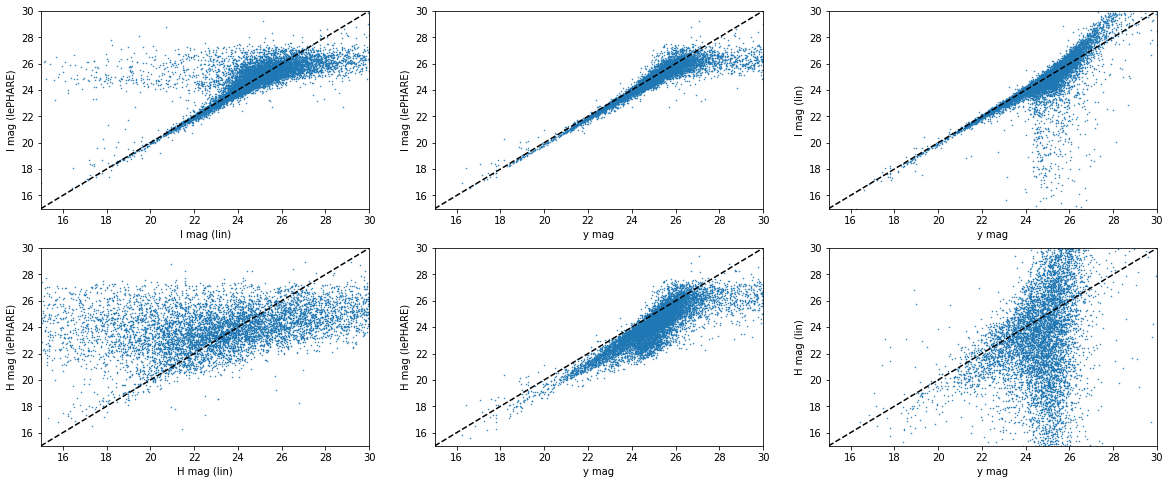

In [21]:
#
fig, ax = plt.subplots(2,3,figsize=(20,8))

ax[0][0].plot(df_in['Ilin'],df_out['Imag_mod'],'.',markersize=1)
ax[0][0].set_xlim([15,30])
ax[0][0].set_ylim([15,30])
ax[0][0].plot([15,30],[15,30],'k--')
ax[0][0].set_xlabel('I mag (lin)')
ax[0][0].set_ylabel('I mag (lePHARE)')

ax[0][1].plot(df_in['ymag_psf'],df_out['Imag_mod'],'.',markersize=1)
ax[0][1].set_xlim([15,30])
ax[0][1].set_ylim([15,30])
ax[0][1].plot([15,30],[15,30],'k--')
ax[0][1].set_xlabel('y mag')
ax[0][1].set_ylabel('I mag (lePHARE)')

ax[0][2].plot(df_in['ymag_psf'],df_in['Ilin'],'.',markersize=1)
ax[0][2].set_xlim([15,30])
ax[0][2].set_ylim([15,30])
ax[0][2].plot([15,30],[15,30],'k--')
ax[0][2].set_xlabel('y mag')
ax[0][2].set_ylabel('I mag (lin)')

ax[1][0].plot(df_in['Hlin'],df_out['Hmag_mod'],'.',markersize=1)
ax[1][0].set_xlim([15,30])
ax[1][0].set_ylim([15,30])
ax[1][0].plot([15,30],[15,30],'k--')
ax[1][0].set_xlabel('H mag (lin)')
ax[1][0].set_ylabel('H mag (lePHARE)')

ax[1][1].plot(df_in['ymag_psf'],df_out['Hmag_mod'],'.',markersize=1)
ax[1][1].set_xlim([15,30])
ax[1][1].set_ylim([15,30])
ax[1][1].plot([15,30],[15,30],'k--')
ax[1][1].set_xlabel('y mag')
ax[1][1].set_ylabel('H mag (lePHARE)')

ax[1][2].plot(df_in['ymag_psf'],df_in['Hlin'],'.',markersize=1)
ax[1][2].set_xlim([15,30])
ax[1][2].set_ylim([15,30])
ax[1][2].plot([15,30],[15,30],'k--')
ax[1][2].set_xlabel('y mag')
ax[1][2].set_ylabel('H mag (lin)')

In [22]:
df_in.head()

,gmag_psf,gmag_psf_err,rmag_psf,rmag_psf_err,imag_psf,imag_psf_err,zmag_psf,zmag_psf_err,ymag_psf,ymag_psf_err,photz,Imag,Imag_err,Hmag,Hmag_err,cls,Ilin,Hlin
1,25.162703,0.048643,24.824329,0.098765,24.648449,0.044306,24.062200,0.073397,23.807316,0.114210,1.56,-99.0,-99.0,-99.0,-99.0,1.0,23.589602,21.406562
2,26.614010,0.174083,26.110352,0.235568,26.181377,0.185494,26.987209,0.964133,25.936779,0.669900,2.71,-99.0,-99.0,-99.0,-99.0,1.0,25.039536,16.042795
3,26.508354,0.150080,25.914230,0.204853,25.727247,0.104715,25.638220,0.277451,25.802702,0.583202,3.02,-99.0,-99.0,-99.0,-99.0,-1.0,25.943197,27.351957
4,25.636112,0.073402,25.555964,0.145333,25.460392,0.101723,25.252043,0.186313,24.749836,0.261826,1.28,-99.0,-99.0,-99.0,-99.0,1.0,24.320868,20.019559
5,26.137220,0.114798,26.065815,0.275288,26.595028,0.218111,26.001362,0.380052,27.513544,2.824566,1.90,-99.0,-99.0,-99.0,-99.0,1.0,28.805200,41.756761


(0, 30)

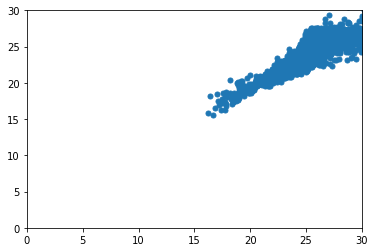

In [46]:
plt.plot(df_in['ymag_psf'],df_out['Hmag_mod'],'.',markersize=10)
plt.xlim([0,30])
plt.ylim([0,30])

In [44]:
np.min(df_out['Imag_mod'][df_out['Imag_mod']!=-99.99])

16.567999999999998